In [1]:
import re
import jieba
import jieba.analyse
import argparse
import pathlib
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import operator


In [98]:
def WordCloudGen(res, mark_img, font_full_path):
    #frequencies = dict(res)
    res = sorted(res, key=lambda x: -x[1])
    res = GenDictWithMaxValue(res)
    res = sorted(res.items(), key=lambda x: -x[1])
    res = dict(res)
    frequencies = res
    
    print(frequencies)
    mask = np.array(Image.open(mark_img))

    cloud = WordCloud(
        font_path=font_full_path,
        background_color='white',    #the background color of the image
        max_words=200,               # the maximum number of word to print
        max_font_size=200,           # the maximum size of the most simular word
        mask=mask,
        width=1980, height=1020
    )

    wordcloud = cloud.fit_words(frequencies)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(30,25))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    #wordcloud.to_file(out_img_full_path)

In [99]:
def GenDictWithMaxValue(list_of_tuples):
    ans_dict = {}
    for k, v in list_of_tuples:
        if(k in ans_dict):
            if(v > ans_dict[k]):
                ans_dict[k] = v
        else:
            ans_dict[k] = v
    return ans_dict

In [100]:
def MaxListOfTupleGroupBy(l):
    it = itertools.groupby(l, operator.itemgetter(0))
    ans = []
    for key, subiter in it:
        ans.append((key, max(item[1] for item in subiter)))
    return(ans)

In [78]:
text_file = './Total_20180614_20170510_2nd_keyword_extraction_tfidf_word2vec/Total_20180614_20170510_2nd_Warriors.tfidf_word2vec.keyword_final'
with open(text_file, "r") as f:
    lines = f.read().splitlines()


In [102]:
word2vec_list = []
for line in lines:
    line_match = re.match(r'\s*(\S+)\s*,\s*(\S+)\s*', line)
    if(line_match is not None):
        keyword_word2vec = line_match.group(1)
        keyword_word2vec_weight = float(line_match.group(2))
        word2vec_list.append((keyword_word2vec, keyword_word2vec_weight))

{'KT': 0.9, '勇': 0.8385928869247437, '勇士': 0.8385928869247437, '勇士隊': 0.8100985884666443, 'KD': 0.8100985884666443, '贏一': 0.8035732507705688, 'Curry': 0.8035732507705688, '過西冠': 0.8008486032485962, '總冠軍': 0.8008486032485962, '四巨': 0.7989752888679504, '咖哩': 0.7989752888679504, '沒柯瑞': 0.7933311462402344, 'curry': 0.7933311462402344, '誰又能': 0.7909563779830933, '防守': 0.7909563779830933, '勇在': 0.7813683152198792, '犯規': 0.7813683152198792, '誰勝': 0.780488133430481, '大晴天': 0.780488133430481, '超賽強': 0.7802026271820068, '三分': 0.7802026271820068, '殘缺': 0.7800557613372803, '鬍子': 0.7800557613372803, '你勇': 0.7795517444610596, '嘴綠': 0.7795517444610596, '休成': 0.7783505916595459, '出來': 0.7783505916595459, '能連霸': 0.7772682309150696, 'AD': 0.7772682309150696, '給勇': 0.7754985094070435, '進攻': 0.7754985094070435, '四星': 0.7742898464202881, 'kd': 0.7742898464202881, '別年': 0.7739527225494385, '冠軍': 0.7739527225494385, '太大團': 0.770334780216217, '一場': 0.770334780216217, '勇會': 0.7676063776016235, '宇宙': 0.76760637

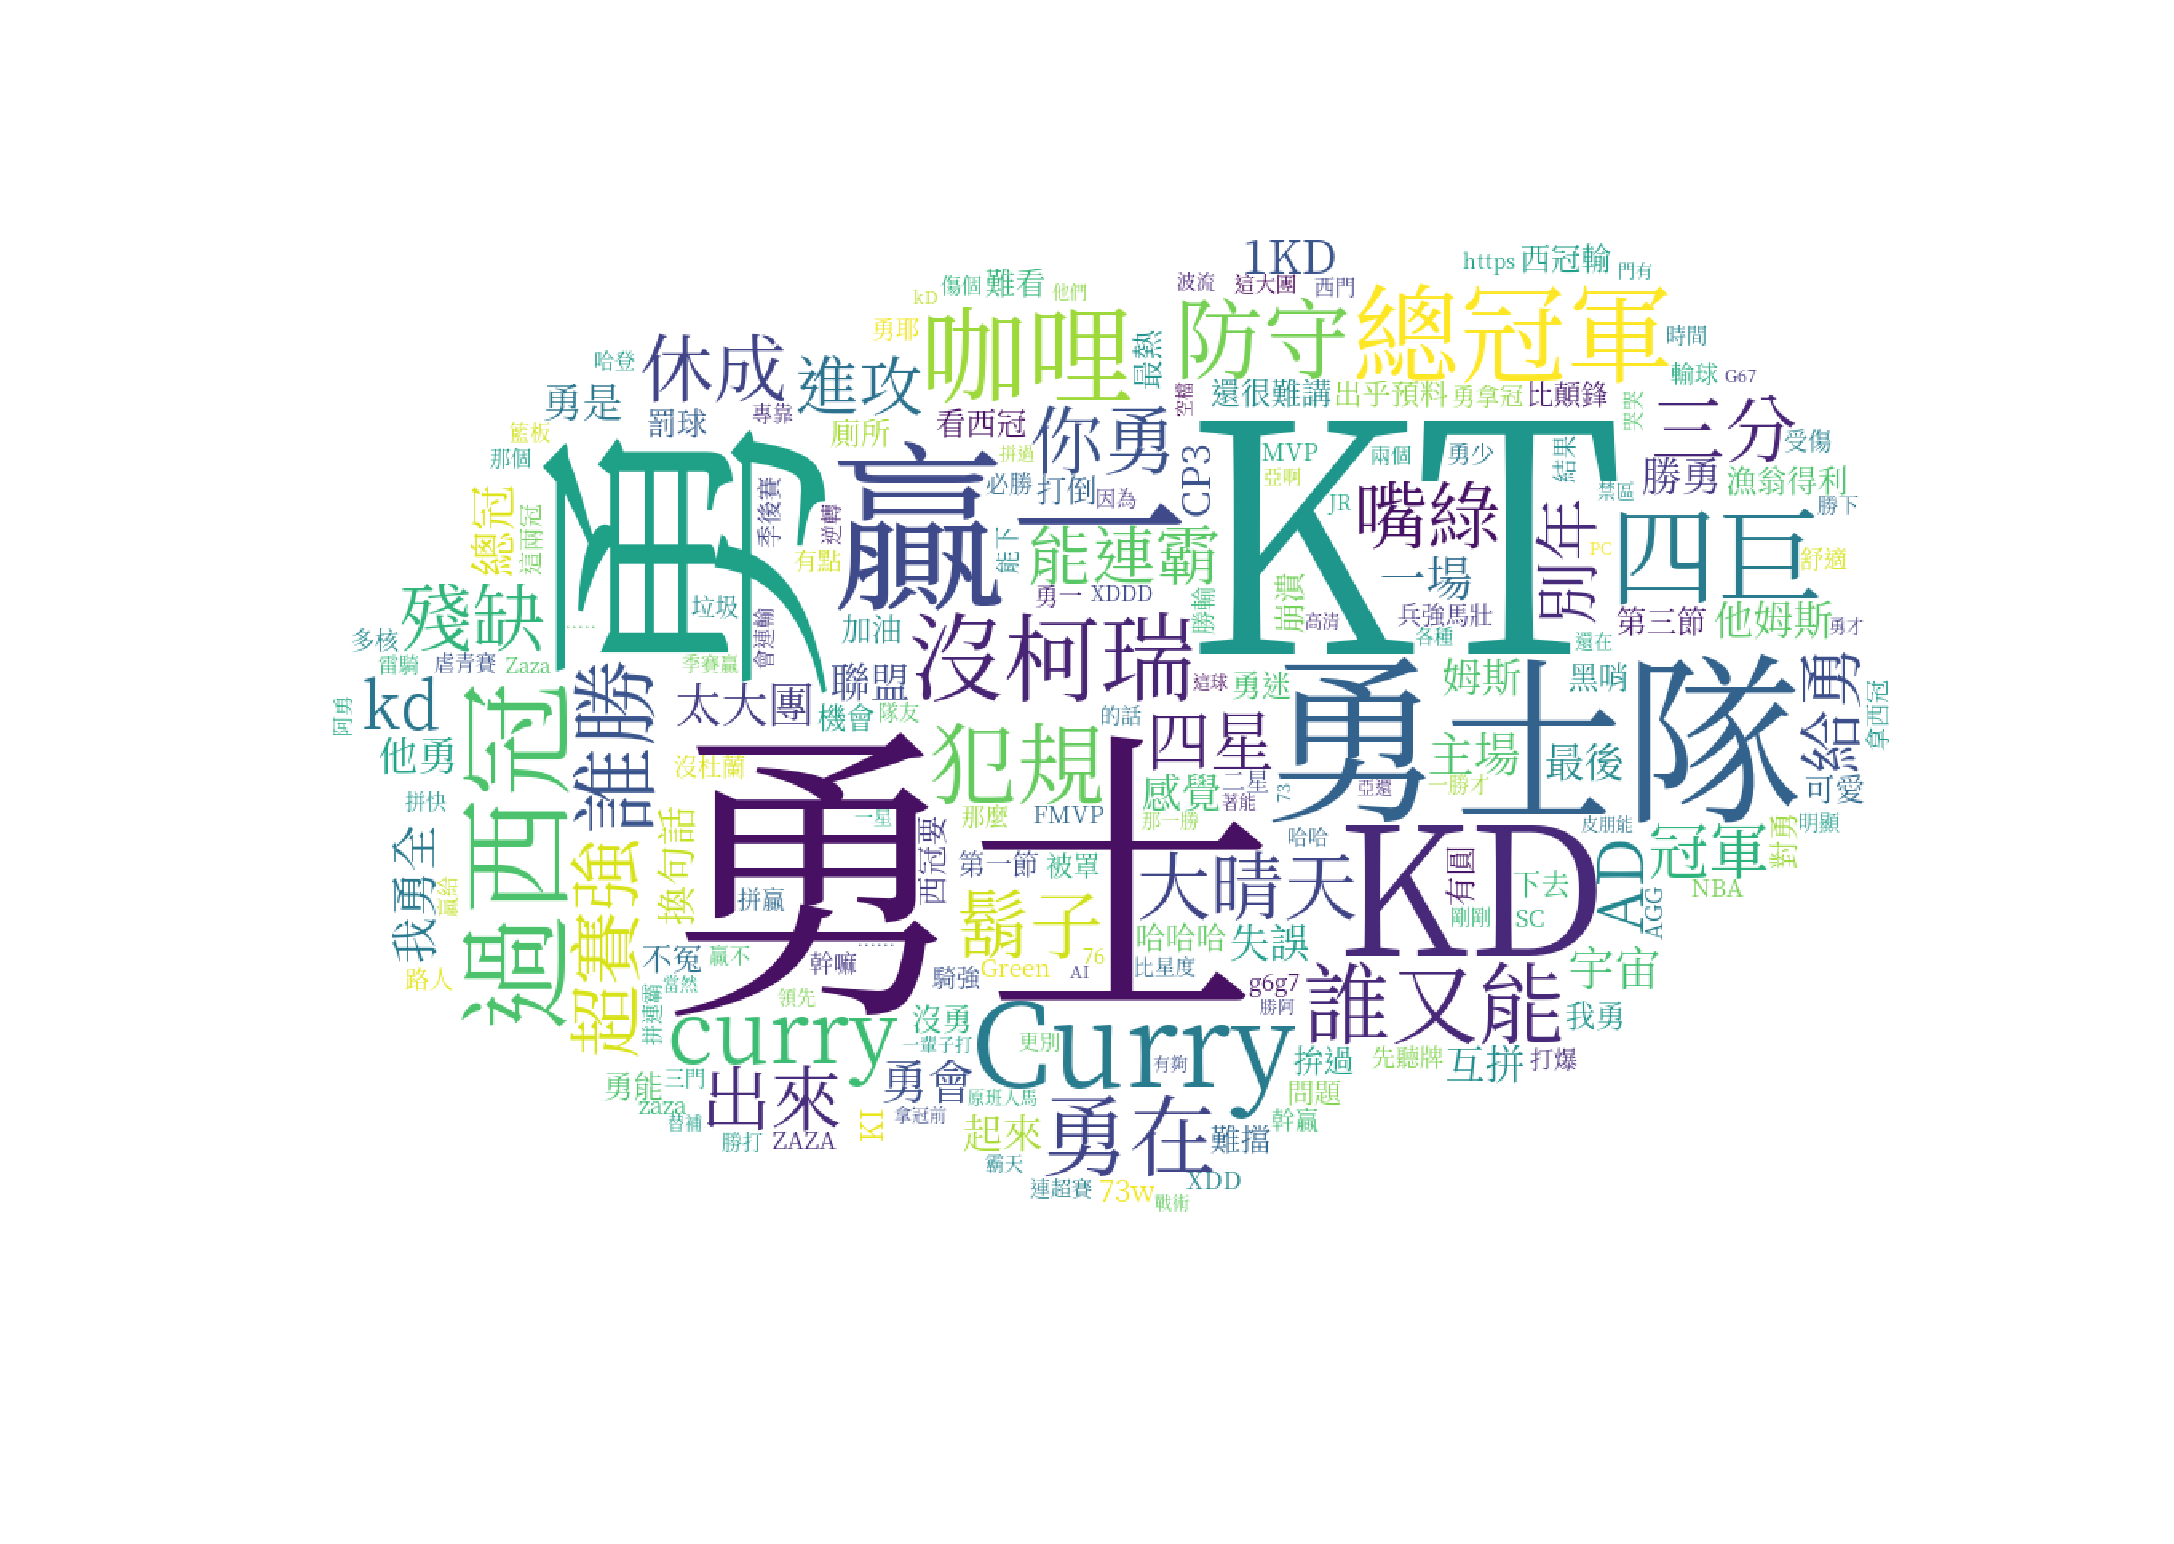

In [103]:
mark_img_full_path = "../Word2Vec/cloud.png"
font_full_path = "../Word2Vec/NotoSerifCJKtc-hinted/NotoSerifCJKtc-Regular.otf"
WordCloudGen(word2vec_list, mark_img_full_path, font_full_path)